In [2]:
import keras

In [3]:
import numpy as np

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Plotting some of the digits

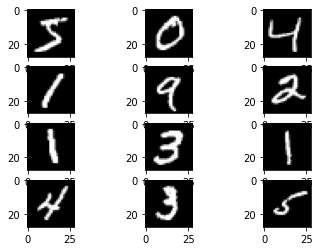

In [5]:
import matplotlib.pyplot as plt

for i in range(12):  
    plt.subplot(4, 3, 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    
plt.show()


# Preprocessing the data 

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [7]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# Building a model

In [8]:
from keras import layers

In [10]:
model = keras.Sequential([
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model and monitoring its performance

In [11]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.4)

Epoch 1/30
282/282 [==============================] - 2s 4ms/step - loss: 0.3539 - accuracy: 0.9011 - val_loss: 0.2555 - val_accuracy: 0.9238
Epoch 2/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9529 - val_loss: 0.1690 - val_accuracy: 0.9514
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9676 - val_loss: 0.1519 - val_accuracy: 0.9531
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9755 - val_loss: 0.1111 - val_accuracy: 0.9673
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9817 - val_loss: 0.1081 - val_accuracy: 0.9676
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9857 - val_loss: 0.1039 - val_accuracy: 0.9697
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9893 - val_loss: 0.1004 - val_accuracy: 0.9707
Epoch 

# Plotting the training and validation losses

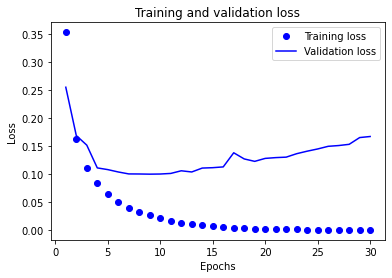

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluating the model on test data

In [13]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 943us/step - loss: 0.1301 - accuracy: 0.9773


In [14]:
results

[0.13013234734535217, 0.9772999882698059]

# Making a prediction about a particular test digit

In [15]:
predictions = model.predict(test_images[79].reshape(1, 784))
predictions.argmax()

1/1 [==============================] - 0s 47ms/step


7

# Comparing the model prediction with the actual data

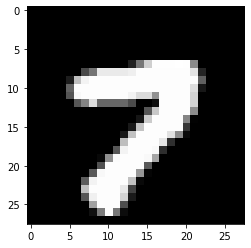

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(test_images[79], cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
test_labels[79]

7